In [6]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import os
import math

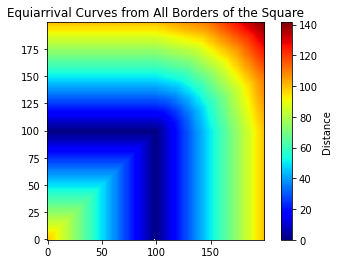

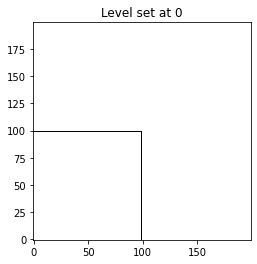

In [5]:
FAR = np.inf
ACCEPTED = -1
CONSIDERED = 1

directions = [
    (1, 0), (-1, 0), (0, 1), (0, -1),  # Cardinal directions
    (1, 1), (-1, -1), (1, -1), (-1, 1),  # Diagonal directions
    (2, 0), (-2, 0), (0, 2), (0, -2),  # Intermediate directions
    (1, 2), (-1, 2), (1, -2), (-1, -2), (2, 1), (-2, 1), (2, -1), (-2, -1)  # Intermediate diagonal directions
]

def solve_eikonal(size):
    u = np.full((size, size), FAR)
    status = np.full((size, size), FAR)
    heap = []

    for x in range(size):
        for y in range(size):
            if (x == int(size/2 - 1) and y <= int(size/2 - 1)) or (y == int(size/2 - 1) and x <= int(size/2 - 1)):
                u[x, y] = 0
                status[x, y] = ACCEPTED
                for dx, dy in directions:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < size and 0 <= ny < size and status[nx, ny] != ACCEPTED:
                        status[nx, ny] = CONSIDERED
                        dist = np.sqrt(dx ** 2 + dy ** 2)
                        heapq.heappush(heap, (dist, (nx, ny)))

    while heap:
        (dist, (x, y)) = heapq.heappop(heap)
        
        if status[x, y] != CONSIDERED:
            continue
 
        status[x, y] = ACCEPTED

        for dx, dy in directions:
            nx, ny = x + dx, y + dy

            if nx < 0 or nx >= size or ny < 0 or ny >= size:
                continue

            if status[nx, ny] != ACCEPTED:
                new_dist = dist + np.sqrt(dx ** 2 + dy ** 2)  

                if new_dist < u[nx, ny]:
                    u[nx, ny] = new_dist
                    status[nx, ny] = CONSIDERED
                    heapq.heappush(heap, (new_dist, (nx, ny)))

    return u

size = 200
u = solve_eikonal(size)

plt.imshow(u, cmap='jet', interpolation='nearest', origin='lower')
plt.colorbar(label='Distance')
plt.title('Equiarrival Curves from All Borders of the Square')
plt.show()

level_set = 0
binary_image = np.isclose(u, level_set, atol=0.5)
plt.imshow(binary_image, cmap='Greys', interpolation='nearest', origin='lower')
plt.title(f'Level set at {level_set}')
plt.show()


In [ ]:
size=8
FAR = np.inf
ACCEPTED = -1
CONSIDERED = 1
directions = [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0)] #two more?

u = np.full((size, size, size), FAR)
status = np.full((size, size, size), FAR)
heap = []

for x in range(size):
    for y in range(size):
        for z in range(size):
            if (x == 0 and z == 0) or (x == size - 1 and z == size/2) or (y == 0 and z == size/4) or (y == size - 1 and z == 3*size/4) or (x == 0 and y == 0) or (x == size - 1 and y == 0) or (y == size-1 and x == 0) or (y == size - 1 and x == size-1):
                u[x, y, z] = 0
                status[x, y, z] = ACCEPTED
                for dx, dy, dz in directions:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < size and 0 <= ny < size and status[nx, ny, z] != ACCEPTED:
                        status[nx, ny, z] = CONSIDERED
                        distance=np.inf
                        new_z=z
                        print(new_z)
                        if (size/8< new_z <=3*size/8) or (5*size/8< new_z <=7*size/8):

                            new_x=nx-np.cos(2*np.pi*new_z/size)/np.sin(2*np.pi*new_z/size)
                            new_y=ny-np.sign(np.sin(2*np.pi*new_z/size))

                            if (new_x-round(new_x)<1e-15):
                                new_x=round(new_x)

                            if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                                if(status[math.floor(new_x), int(new_y), z] == ACCEPTED) and (status[math.ceil(new_x), int(new_y), z] == ACCEPTED):
                                    new_distance=(new_x-math.floor(new_x))*u[math.floor(new_x), int(new_y), z]+(math.ceil(new_x)-new_x)*u[math.ceil(new_x), int(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                    if (new_distance<distance):
                                        distance=new_distance
                        else:
                            new_x=nx-np.sign(np.cos(2*np.pi*new_z/size))
                            new_y=ny-np.sin(2*np.pi*new_z/size)/np.cos(2*np.pi*new_z/size)  

                            if (new_y-round(new_y)<1e-15):
                                new_y=round(new_y)
                            if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                                if(status[int(new_x), math.floor(new_y), z] == ACCEPTED) and (status[int(new_x), math.ceil(new_y), z] == ACCEPTED):

                                    new_distance=(new_y-math.floor(new_y))*u[int(new_x), math.floor(new_y), z]+(math.ceil(new_y)-new_y)*u[int(new_x), math.floor(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)

                                    if (new_distance<distance):
                                        distance=new_distance
                        u[nx, ny, z]=distance
                        heapq.heappush(heap, (distance, (nx, ny, z)))

In [293]:
u[:,:,1]

array([[ 0., inf, inf, inf, inf, inf, inf,  0.],
       [inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf, inf, inf],
       [ 0., inf, inf, inf, inf, inf, inf,  0.]])

In [485]:
FAR = np.inf
ACCEPTED = -1
CONSIDERED = 1
directions = [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0)] #two more?

def solve_eikonal(size):
    u = np.full((size, size, size), FAR)
    status = np.full((size, size, size), FAR)
    heap = []

    for x in range(size):
        for y in range(size):
            for z in range(size):
                if (x == 0 and z == 0) or (x == size - 1 and z == size/2) or (y == 0 and z == size/4) or (y == size - 1 and z == 3*size/4) or (x == 0 and y == 0) or (x == size - 1 and y == 0) or (y == size-1 and x == 0) or (y == size - 1 and x == size-1):
                    u[x, y, z] = 0
                    status[x, y, z] = ACCEPTED
                    for dx, dy, dz in directions:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < size and 0 <= ny < size and status[nx, ny, z] != ACCEPTED:
                            status[nx, ny, z] = CONSIDERED
                            distance=np.inf
                            new_z=z
                            if (size/8< new_z <=3*size/8) or (5*size/8< new_z <=7*size/8):

                                new_x=nx-np.cos(2*np.pi*new_z/size)/np.abs(np.sin(2*np.pi*new_z/size))
                                new_y=ny-np.sign(np.sin(2*np.pi*new_z/size))

                                if (np.abs(new_x-round(new_x))<1e-15):
                                    new_x=round(new_x)

                                if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                                    if(status[math.floor(new_x), int(new_y), z] == ACCEPTED) and (status[math.ceil(new_x), int(new_y), z] == ACCEPTED):
                                        if (new_x!=round(new_x)):
                                            new_distance=(new_x-math.floor(new_x))*u[math.floor(new_x), int(new_y), z]+(math.ceil(new_x)-new_x)*u[math.ceil(new_x), int(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        if (new_x==round(new_x)):
                                            new_distance=u[new_x, int(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        if (new_distance<distance):
                                            distance=new_distance
                            else:
                                new_x=nx-np.sign(np.cos(2*np.pi*new_z/size))
                                new_y=ny-np.sin(2*np.pi*new_z/size)/np.abs(np.cos(2*np.pi*new_z/size))  

                                if (np.abs(new_y-round(new_y))<1e-15):
                                    new_y=round(new_y)
                                if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                                    if(status[int(new_x), math.floor(new_y), z] == ACCEPTED) and (status[int(new_x), math.ceil(new_y), z] == ACCEPTED):
                                        if (new_y!=round(new_y)):
                                            new_distance=(new_y-math.floor(new_y))*u[int(new_x), math.floor(new_y), z]+(math.ceil(new_y)-new_y)*u[int(new_x), math.floor(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        if (new_y==round(new_y)):
                                            new_distance=u[int(new_x), new_y, z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                                        if (new_distance<distance):
                                            distance=new_distance
                                            
                            u[nx, ny, z]=distance
                            heapq.heappush(heap, (distance, (nx, ny, z)))
                          
    while heap:
        (dist, (x, y, z)) = heapq.heappop(heap)
        
        if status[x, y, z] != CONSIDERED:
            continue

        u[x, y, z]=dist
        status[x, y, z] = ACCEPTED
        
        for dx, dy, dz in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < size and 0 <= ny < size and status[nx, ny, z] != ACCEPTED:
                status[nx, ny, z] = CONSIDERED
                distance=np.inf
                new_z=z
                if (size/8< new_z <=3*size/8) or (5*size/8< new_z <=7*size/8):

                    new_x=nx-np.cos(2*np.pi*new_z/size)/np.abs(np.sin(2*np.pi*new_z/size))
                    new_y=ny-np.sign(np.sin(2*np.pi*new_z/size))

                    if (np.abs(new_x-round(new_x))<1e-15):
                        new_x=round(new_x)

                    if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                        if(status[math.floor(new_x), int(new_y), z] == ACCEPTED) and (status[math.ceil(new_x), int(new_y), z] == ACCEPTED):
                            if (new_x!=round(new_x)):
                                new_distance=(new_x-math.floor(new_x))*u[math.floor(new_x), int(new_y), z]+(math.ceil(new_x)-new_x)*u[math.ceil(new_x), int(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            if (new_x==round(new_x)):
                                new_distance=u[new_x, int(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            if (new_distance<distance):
                                distance=new_distance
                else:
                    new_x=nx-np.sign(np.cos(2*np.pi*new_z/size))
                    new_y=ny-np.sin(2*np.pi*new_z/size)/np.abs(np.cos(2*np.pi*new_z/size))  

                    if (np.abs(new_y-round(new_y))<1e-15):
                        if(new_z==1):
                            print(new_y)
                        new_y=round(new_y)
                    if (0 <= new_x <= size-1 and 0 <= new_y <= size-1):

                        if(status[int(new_x), math.floor(new_y), z] == ACCEPTED) and (status[int(new_x), math.ceil(new_y), z] == ACCEPTED):
                            if(new_y!=round(new_y)):
                                new_distance=(new_y-math.floor(new_y))*u[int(new_x), math.floor(new_y), z]+(math.ceil(new_y)-new_y)*u[int(new_x), math.floor(new_y), z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            if(new_y==round(new_y)):
                                new_distance=u[int(new_x), new_y, z]+np.sqrt((nx-new_x)**2+(ny-new_y)**2)
                            if (new_distance<distance):
                                distance=new_distance

                if distance < u[nx, ny, z]:                   
                    u[nx,ny,z]=distance
                heapq.heappush(heap, (distance, (nx, ny, z)))
                    
    return u,status

size = 200
u,status = solve_eikonal(size)